In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 750)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511),4)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(4):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(4 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        print(number_codes)
        break

1
[[1, 1, 1, 1], [0, 0, 0, 0], [1, 1, 1, 0], [1, 0, 0, 0], [0, 0, 1, 1], [1, 1, 0, 1], [0, 1, 0, 1], [1, 0, 0, 1], [0, 0, 0, 1], [0, 1, 1, 1]]


In [6]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:811
number of class2:806

 ****** Running generation 0 ****** 

Population's average fitness: 0.50216 stdev: 0.06285
Best fitness: 0.68336 - size: (2, 13) - species 1 - id 79
Average adjusted fitness: 0.171
Mean genetic distance 2.822, standard deviation 0.456
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 6.296 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53788 stdev: 0.06800
Best fitness: 0.74459 - size: (3, 15) - species 1 - id 371
Average adjusted fitness: 0.170
Mean genetic distance 2.938, standard deviation 0.487
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 7.894 sec (7.095 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56490 stdev: 0.07012
Best fitness: 0.75077 - size: (4, 17) - species 18 - id 474
Average adjusted fitness: 0.225
Mean genetic distance 3.014, standard deviation 0.507
Population of 200 members in 25 species
Total extinctio

Population's average fitness: 0.63157 stdev: 0.08127
Best fitness: 0.76994 - size: (8, 24) - species 35 - id 2151
Average adjusted fitness: 0.178
Mean genetic distance 3.265, standard deviation 0.524
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 19.447 sec (20.107 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61883 stdev: 0.09246
Best fitness: 0.76994 - size: (8, 24) - species 35 - id 2151
Average adjusted fitness: 0.280
Mean genetic distance 3.295, standard deviation 0.524
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 19.783 sec (20.249 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.61876 stdev: 0.09189
Best fitness: 0.80148 - size: (4, 17) - species 11 - id 3699
Average adjusted fitness: 0.224
Mean genetic distance 3.275, standard deviation 0.510
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 20.640 sec (20.293 average)

 

Population's average fitness: 0.63972 stdev: 0.09666
Best fitness: 0.81756 - size: (8, 25) - species 11 - id 6663
Average adjusted fitness: 0.254
Mean genetic distance 3.254, standard deviation 0.523
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 23.314 sec (23.568 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.65081 stdev: 0.09122
Best fitness: 0.81756 - size: (8, 25) - species 11 - id 6663
Average adjusted fitness: 0.218
Mean genetic distance 3.266, standard deviation 0.535
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 26.998 sec (23.824 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.64247 stdev: 0.09645
Best fitness: 0.81818 - size: (9, 28) - species 11 - id 7318
Average adjusted fitness: 0.176
Mean genetic distance 3.279, standard deviation 0.510
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 25.056 sec (23.846 average)

 

Population's average fitness: 0.65098 stdev: 0.10466
Best fitness: 0.83921 - size: (10, 30) - species 11 - id 9845
Average adjusted fitness: 0.383
Mean genetic distance 3.298, standard deviation 0.609
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 20.626 sec (20.732 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.65512 stdev: 0.09547
Best fitness: 0.83921 - size: (10, 30) - species 11 - id 9845
Average adjusted fitness: 0.218
Mean genetic distance 3.241, standard deviation 0.645
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 20.610 sec (20.728 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.65113 stdev: 0.10991
Best fitness: 0.83921 - size: (10, 30) - species 11 - id 9845
Average adjusted fitness: 0.351
Mean genetic distance 3.258, standard deviation 0.609
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 21.124 sec (20.739 average)

Population's average fitness: 0.66418 stdev: 0.11642
Best fitness: 0.84663 - size: (10, 27) - species 71 - id 12359
Average adjusted fitness: 0.241
Mean genetic distance 3.150, standard deviation 0.622
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 22.554 sec (22.255 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.67555 stdev: 0.11136
Best fitness: 0.84663 - size: (10, 27) - species 71 - id 12359
Average adjusted fitness: 0.334
Mean genetic distance 3.139, standard deviation 0.657
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 21.935 sec (22.254 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.65555 stdev: 0.11920
Best fitness: 0.84663 - size: (10, 27) - species 71 - id 12359
Average adjusted fitness: 0.367
Mean genetic distance 3.146, standard deviation 0.625
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 23.847 sec (22.491 avera

Population's average fitness: 0.68436 stdev: 0.11190
Best fitness: 0.86147 - size: (16, 45) - species 66 - id 18850
Average adjusted fitness: 0.250
Mean genetic distance 3.213, standard deviation 0.663
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 26.465 sec (26.870 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.66094 stdev: 0.11502
Best fitness: 0.86147 - size: (16, 45) - species 66 - id 18850
Average adjusted fitness: 0.237
Mean genetic distance 3.239, standard deviation 0.629
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 27.395 sec (27.122 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.67214 stdev: 0.11452
Best fitness: 0.86147 - size: (16, 45) - species 66 - id 18850
Average adjusted fitness: 0.217
Mean genetic distance 3.212, standard deviation 0.615
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 28.247 sec (27.376 ave

Population's average fitness: 0.66797 stdev: 0.11852
Best fitness: 0.86395 - size: (18, 49) - species 66 - id 21416
Average adjusted fitness: 0.257
Mean genetic distance 3.206, standard deviation 0.628
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 32.159 sec (30.403 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.65824 stdev: 0.11860
Best fitness: 0.86395 - size: (18, 49) - species 66 - id 21416
Average adjusted fitness: 0.231
Mean genetic distance 3.187, standard deviation 0.645
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 29.832 sec (30.518 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.66794 stdev: 0.11830
Best fitness: 0.86395 - size: (18, 49) - species 66 - id 21416
Average adjusted fitness: 0.228
Mean genetic distance 3.220, standard deviation 0.621
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 29.372 sec (30.509 ave

Population's average fitness: 0.68586 stdev: 0.12014
Best fitness: 0.86395 - size: (18, 49) - species 66 - id 21416
Average adjusted fitness: 0.277
Mean genetic distance 3.240, standard deviation 0.634
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 34.956 sec (33.652 average)

 ****** Running generation 169 ****** 

Population's average fitness: 0.68655 stdev: 0.11104
Best fitness: 0.86395 - size: (18, 49) - species 66 - id 21416
Average adjusted fitness: 0.241
Mean genetic distance 3.232, standard deviation 0.653
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 35.188 sec (33.601 average)

 ****** Running generation 170 ****** 

Population's average fitness: 0.68310 stdev: 0.12081
Best fitness: 0.86395 - size: (18, 49) - species 66 - id 21416
Average adjusted fitness: 0.294
Mean genetic distance 3.204, standard deviation 0.663
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 35.593 sec (33.577 ave

Population's average fitness: 0.69095 stdev: 0.11100
Best fitness: 0.86395 - size: (18, 49) - species 101 - id 21416
Average adjusted fitness: 0.292
Mean genetic distance 3.184, standard deviation 0.651
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 34.985 sec (36.468 average)

 ****** Running generation 193 ****** 

Population's average fitness: 0.69275 stdev: 0.11133
Best fitness: 0.86395 - size: (18, 49) - species 101 - id 21416
Average adjusted fitness: 0.294
Mean genetic distance 3.184, standard deviation 0.655
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 34.550 sec (36.604 average)

 ****** Running generation 194 ****** 

Population's average fitness: 0.68389 stdev: 0.12302
Best fitness: 0.86395 - size: (18, 49) - species 101 - id 21416
Average adjusted fitness: 0.393
Mean genetic distance 3.188, standard deviation 0.643
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 34.150 sec (36.686 

Mean genetic distance 3.160, standard deviation 0.651
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 40.977 sec (64.417 average)

 ****** Running generation 216 ****** 

Population's average fitness: 0.68128 stdev: 0.12160
Best fitness: 0.86395 - size: (18, 49) - species 101 - id 21416
Average adjusted fitness: 0.259
Mean genetic distance 3.121, standard deviation 0.645
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 43.284 sec (64.769 average)

 ****** Running generation 217 ****** 

Population's average fitness: 0.68404 stdev: 0.11802
Best fitness: 0.86395 - size: (18, 49) - species 101 - id 21416
Average adjusted fitness: 0.195
Mean genetic distance 3.047, standard deviation 0.651
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 43.424 sec (64.739 average)

 ****** Running generation 218 ****** 

Population's average fitness: 0.67696 stdev: 0.11605
Best fitness: 0.86395 - size: (18, 49) - speci

Population's average fitness: 0.68678 stdev: 0.11032
Best fitness: 0.86456 - size: (19, 51) - species 101 - id 37394
Average adjusted fitness: 0.254
Mean genetic distance 3.049, standard deviation 0.680
Population of 196 members in 10 species
Total extinctions: 0
Generation time: 42.213 sec (41.940 average)

 ****** Running generation 240 ****** 

Population's average fitness: 0.68643 stdev: 0.11967
Best fitness: 0.86456 - size: (19, 51) - species 101 - id 37394
Average adjusted fitness: 0.451
Mean genetic distance 3.050, standard deviation 0.674
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 41.495 sec (41.831 average)

 ****** Running generation 241 ****** 

Population's average fitness: 0.68837 stdev: 0.11683
Best fitness: 0.86456 - size: (19, 51) - species 101 - id 37394
Average adjusted fitness: 0.203
Mean genetic distance 3.076, standard deviation 0.678
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 43.320 sec (41.988 

Mean genetic distance 2.917, standard deviation 0.585
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 44.858 sec (44.274 average)

 ****** Running generation 263 ****** 

Population's average fitness: 0.69384 stdev: 0.11466
Best fitness: 0.87631 - size: (21, 55) - species 101 - id 41663
Average adjusted fitness: 0.234
Mean genetic distance 2.913, standard deviation 0.586
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 52.141 sec (45.216 average)

 ****** Running generation 264 ****** 

Population's average fitness: 0.70602 stdev: 0.11043
Best fitness: 0.87631 - size: (21, 55) - species 101 - id 41663
Average adjusted fitness: 0.265
Mean genetic distance 2.923, standard deviation 0.575
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 46.803 sec (45.576 average)

 ****** Running generation 265 ****** 

Population's average fitness: 0.69538 stdev: 0.11088
Best fitness: 0.87631 - size: (21, 55) - speci

Population's average fitness: 0.69526 stdev: 0.11454
Best fitness: 0.87631 - size: (21, 55) - species 101 - id 41663
Average adjusted fitness: 0.196
Mean genetic distance 2.824, standard deviation 0.485
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 39.088 sec (40.818 average)

 ****** Running generation 287 ****** 

Population's average fitness: 0.68798 stdev: 0.11898
Best fitness: 0.87631 - size: (21, 55) - species 101 - id 41663
Average adjusted fitness: 0.232
Mean genetic distance 2.812, standard deviation 0.486
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 40.874 sec (40.641 average)

 ****** Running generation 288 ****** 

Population's average fitness: 0.69726 stdev: 0.11243
Best fitness: 0.87631 - size: (21, 55) - species 101 - id 41663
Average adjusted fitness: 0.235
Mean genetic distance 2.809, standard deviation 0.488
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 37.885 sec (40.207 

Population's average fitness: 0.70429 stdev: 0.11412
Best fitness: 0.87631 - size: (21, 55) - species 101 - id 41663
Average adjusted fitness: 0.205
Mean genetic distance 2.687, standard deviation 0.381
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 43.227 sec (39.468 average)

 ****** Running generation 311 ****** 

Population's average fitness: 0.70235 stdev: 0.11577
Best fitness: 0.87631 - size: (21, 55) - species 101 - id 41663
Average adjusted fitness: 0.396
Mean genetic distance 2.687, standard deviation 0.375
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 37.167 sec (39.431 average)

 ****** Running generation 312 ****** 

Population's average fitness: 0.70410 stdev: 0.12134
Best fitness: 0.87631 - size: (21, 55) - species 101 - id 41663
Average adjusted fitness: 0.335
Mean genetic distance 2.712, standard deviation 0.403
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 39.254 sec (39.600 

Mean genetic distance 2.812, standard deviation 0.440
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 43.993 sec (41.547 average)

 ****** Running generation 334 ****** 

Population's average fitness: 0.70629 stdev: 0.11436
Best fitness: 0.87631 - size: (21, 55) - species 101 - id 41663
Average adjusted fitness: 0.208
Mean genetic distance 2.824, standard deviation 0.421
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 42.841 sec (41.890 average)

 ****** Running generation 335 ****** 

Population's average fitness: 0.70177 stdev: 0.11999
Best fitness: 0.87631 - size: (21, 55) - species 101 - id 41663
Average adjusted fitness: 0.326
Mean genetic distance 2.843, standard deviation 0.415
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 43.681 sec (42.009 average)

 ****** Running generation 336 ****** 

Population's average fitness: 0.70564 stdev: 0.11970
Best fitness: 0.87631 - size: (21, 55) - speci

Population's average fitness: 0.68136 stdev: 0.11329
Best fitness: 0.87631 - size: (21, 55) - species 155 - id 41663
Average adjusted fitness: 0.186
Mean genetic distance 2.747, standard deviation 0.419
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 45.013 sec (45.227 average)

 ****** Running generation 358 ****** 

Population's average fitness: 0.67464 stdev: 0.11776
Best fitness: 0.87631 - size: (21, 55) - species 155 - id 41663
Average adjusted fitness: 0.298
Mean genetic distance 2.781, standard deviation 0.422
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 45.815 sec (45.293 average)

 ****** Running generation 359 ****** 

Population's average fitness: 0.69318 stdev: 0.11316
Best fitness: 0.87631 - size: (21, 55) - species 155 - id 41663
Average adjusted fitness: 0.324
Mean genetic distance 2.779, standard deviation 0.459
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 51.719 sec (46.162 

Mean genetic distance 2.712, standard deviation 0.463
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 43.026 sec (45.916 average)

 ****** Running generation 381 ****** 

Population's average fitness: 0.70100 stdev: 0.10630
Best fitness: 0.87631 - size: (21, 55) - species 155 - id 41663
Average adjusted fitness: 0.303
Mean genetic distance 2.708, standard deviation 0.459
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 42.928 sec (45.675 average)

 ****** Running generation 382 ****** 

Population's average fitness: 0.70716 stdev: 0.10470
Best fitness: 0.87631 - size: (21, 55) - species 155 - id 41663
Average adjusted fitness: 0.243
Mean genetic distance 2.651, standard deviation 0.482
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 41.523 sec (44.913 average)

 ****** Running generation 383 ****** 

Population's average fitness: 0.69279 stdev: 0.11206
Best fitness: 0.87631 - size: (21, 55) - specie

Population's average fitness: 0.70206 stdev: 0.10949
Best fitness: 0.87631 - size: (21, 55) - species 155 - id 41663
Average adjusted fitness: 0.242
Mean genetic distance 2.645, standard deviation 0.398
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 42.260 sec (43.618 average)

 ****** Running generation 405 ****** 

Population's average fitness: 0.69976 stdev: 0.11447
Best fitness: 0.87631 - size: (21, 55) - species 155 - id 41663
Average adjusted fitness: 0.296
Mean genetic distance 2.670, standard deviation 0.385
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 42.348 sec (43.303 average)

 ****** Running generation 406 ****** 

Population's average fitness: 0.70587 stdev: 0.11802
Best fitness: 0.87631 - size: (21, 55) - species 155 - id 41663
Average adjusted fitness: 0.221
Mean genetic distance 2.663, standard deviation 0.391
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 40.437 sec (42.823 

Mean genetic distance 2.707, standard deviation 0.402
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 47.108 sec (44.863 average)

 ****** Running generation 428 ****** 

Population's average fitness: 0.71314 stdev: 0.11999
Best fitness: 0.87631 - size: (21, 55) - species 155 - id 41663
Average adjusted fitness: 0.451
Mean genetic distance 2.701, standard deviation 0.425
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 44.758 sec (45.495 average)

 ****** Running generation 429 ****** 

Population's average fitness: 0.73192 stdev: 0.10048
Best fitness: 0.87631 - size: (21, 55) - species 155 - id 41663
Average adjusted fitness: 0.324
Mean genetic distance 2.697, standard deviation 0.432
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 41.385 sec (45.113 average)

 ****** Running generation 430 ****** 

Population's average fitness: 0.70704 stdev: 0.12212
Best fitness: 0.87631 - size: (21, 55) - speci

Population's average fitness: 0.70270 stdev: 0.12215
Best fitness: 0.87631 - size: (21, 55) - species 155 - id 41663
Average adjusted fitness: 0.377
Mean genetic distance 2.731, standard deviation 0.438
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 42.803 sec (39.120 average)

 ****** Running generation 452 ****** 

Population's average fitness: 0.70051 stdev: 0.12223
Best fitness: 0.87631 - size: (21, 55) - species 155 - id 41663
Average adjusted fitness: 0.210
Mean genetic distance 2.731, standard deviation 0.423
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 41.306 sec (39.412 average)

 ****** Running generation 453 ****** 

Population's average fitness: 0.71429 stdev: 0.11927
Best fitness: 0.87631 - size: (21, 55) - species 155 - id 41663
Average adjusted fitness: 0.346
Mean genetic distance 2.746, standard deviation 0.437
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 42.160 sec (39.867 a

Mean genetic distance 2.784, standard deviation 0.457
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 39.464 sec (41.953 average)

 ****** Running generation 475 ****** 

Population's average fitness: 0.69278 stdev: 0.12537
Best fitness: 0.87631 - size: (21, 55) - species 155 - id 41663
Average adjusted fitness: 0.329
Mean genetic distance 2.798, standard deviation 0.447
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 39.044 sec (41.874 average)

 ****** Running generation 476 ****** 

Population's average fitness: 0.70845 stdev: 0.11943
Best fitness: 0.87631 - size: (21, 55) - species 155 - id 41663
Average adjusted fitness: 0.343
Mean genetic distance 2.795, standard deviation 0.460
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 44.295 sec (42.257 average)

 ****** Running generation 477 ****** 

Population's average fitness: 0.70201 stdev: 0.12244
Best fitness: 0.87631 - size: (21, 55) - speci

Population's average fitness: 0.70083 stdev: 0.11757
Best fitness: 0.87631 - size: (21, 55) - species 155 - id 41663
Average adjusted fitness: 0.200
Mean genetic distance 2.663, standard deviation 0.444
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 50.779 sec (53.608 average)

 ****** Running generation 499 ****** 

Population's average fitness: 0.70452 stdev: 0.11365
Best fitness: 0.87631 - size: (21, 55) - species 155 - id 41663
Average adjusted fitness: 0.304
Mean genetic distance 2.618, standard deviation 0.418
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 53.204 sec (53.134 average)

 ****** Running generation 500 ****** 

Population's average fitness: 0.70124 stdev: 0.12250
Best fitness: 0.87631 - size: (21, 55) - species 155 - id 41663
Average adjusted fitness: 0.432
Mean genetic distance 2.617, standard deviation 0.427
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 50.212 sec (52.583 ave

Population's average fitness: 0.70727 stdev: 0.12412
Best fitness: 0.87631 - size: (21, 55) - species 155 - id 41663
Average adjusted fitness: 0.235
Mean genetic distance 2.703, standard deviation 0.443
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 49.251 sec (50.758 average)

 ****** Running generation 523 ****** 

Population's average fitness: 0.72441 stdev: 0.10926
Best fitness: 0.87631 - size: (21, 55) - species 155 - id 41663
Average adjusted fitness: 0.230
Mean genetic distance 2.695, standard deviation 0.445
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 49.854 sec (50.931 average)

 ****** Running generation 524 ****** 

Population's average fitness: 0.71768 stdev: 0.11902
Best fitness: 0.87631 - size: (21, 55) - species 155 - id 41663
Average adjusted fitness: 0.227
Mean genetic distance 2.700, standard deviation 0.444
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 51.491 sec (51.339 

Mean genetic distance 2.698, standard deviation 0.443
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 59.467 sec (52.472 average)

 ****** Running generation 546 ****** 

Population's average fitness: 0.71907 stdev: 0.11124
Best fitness: 0.87631 - size: (21, 55) - species 155 - id 41663
Average adjusted fitness: 0.231
Mean genetic distance 2.714, standard deviation 0.439
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 53.474 sec (52.885 average)

 ****** Running generation 547 ****** 

Population's average fitness: 0.70417 stdev: 0.11774
Best fitness: 0.87631 - size: (21, 55) - species 155 - id 41663
Average adjusted fitness: 0.337
Mean genetic distance 2.700, standard deviation 0.469
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 53.999 sec (53.003 average)

 ****** Running generation 548 ****** 

Population's average fitness: 0.69223 stdev: 0.12297
Best fitness: 0.87631 - size: (21, 55) - speci

Population's average fitness: 0.70214 stdev: 0.11381
Best fitness: 0.87631 - size: (21, 55) - species 155 - id 41663
Average adjusted fitness: 0.207
Mean genetic distance 2.696, standard deviation 0.540
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 55.088 sec (58.070 average)

 ****** Running generation 570 ****** 

Population's average fitness: 0.68398 stdev: 0.13157
Best fitness: 0.87631 - size: (21, 55) - species 155 - id 41663
Average adjusted fitness: 0.268
Mean genetic distance 2.712, standard deviation 0.543
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 55.661 sec (58.230 average)

 ****** Running generation 571 ****** 

Population's average fitness: 0.69018 stdev: 0.11271
Best fitness: 0.87631 - size: (21, 55) - species 155 - id 41663
Average adjusted fitness: 0.221
Mean genetic distance 2.659, standard deviation 0.537
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 55.532 sec (57.714 ave

Population's average fitness: 0.72431 stdev: 0.12105
Best fitness: 0.87631 - size: (21, 55) - species 155 - id 41663
Average adjusted fitness: 0.454
Mean genetic distance 2.653, standard deviation 0.398
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 38.257 sec (39.170 average)

 ****** Running generation 594 ****** 

Population's average fitness: 0.71312 stdev: 0.11919
Best fitness: 0.87631 - size: (21, 55) - species 155 - id 41663
Average adjusted fitness: 0.258
Mean genetic distance 2.647, standard deviation 0.404
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 43.343 sec (39.568 average)

 ****** Running generation 595 ****** 

Population's average fitness: 0.70005 stdev: 0.12627
Best fitness: 0.87631 - size: (21, 55) - species 155 - id 41663
Average adjusted fitness: 0.368
Mean genetic distance 2.677, standard deviation 0.408
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 37.517 sec (38.994 

Mean genetic distance 2.661, standard deviation 0.398
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 44.101 sec (43.882 average)

 ****** Running generation 617 ****** 

Population's average fitness: 0.70224 stdev: 0.12534
Best fitness: 0.87631 - size: (21, 55) - species 155 - id 41663
Average adjusted fitness: 0.296
Mean genetic distance 2.655, standard deviation 0.431
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 40.073 sec (43.963 average)

 ****** Running generation 618 ****** 

Population's average fitness: 0.70512 stdev: 0.12050
Best fitness: 0.87631 - size: (21, 55) - species 155 - id 41663
Average adjusted fitness: 0.376
Mean genetic distance 2.707, standard deviation 0.449
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 40.951 sec (43.450 average)

 ****** Running generation 619 ****** 

Population's average fitness: 0.72103 stdev: 0.11846
Best fitness: 0.87631 - size: (21, 55) - speci

Population's average fitness: 0.69767 stdev: 0.12036
Best fitness: 0.87631 - size: (21, 55) - species 155 - id 41663
Average adjusted fitness: 0.392
Mean genetic distance 2.854, standard deviation 0.476
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 50.090 sec (47.389 average)

 ****** Running generation 641 ****** 

Population's average fitness: 0.69005 stdev: 0.12483
Best fitness: 0.87631 - size: (21, 55) - species 155 - id 41663
Average adjusted fitness: 0.423
Mean genetic distance 2.867, standard deviation 0.473
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 49.139 sec (48.070 average)

 ****** Running generation 642 ****** 

Population's average fitness: 0.68611 stdev: 0.12154
Best fitness: 0.87631 - size: (21, 55) - species 155 - id 41663
Average adjusted fitness: 0.453
Mean genetic distance 2.879, standard deviation 0.485
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 54.108 sec (49.231 

Mean genetic distance 2.918, standard deviation 0.480
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 51.992 sec (53.367 average)

 ****** Running generation 664 ****** 

Population's average fitness: 0.71837 stdev: 0.11675
Best fitness: 0.87631 - size: (21, 55) - species 155 - id 41663
Average adjusted fitness: 0.315
Mean genetic distance 2.858, standard deviation 0.506
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 53.692 sec (53.713 average)

 ****** Running generation 665 ****** 

Population's average fitness: 0.72849 stdev: 0.10798
Best fitness: 0.87631 - size: (21, 55) - species 155 - id 41663
Average adjusted fitness: 0.237
Mean genetic distance 2.882, standard deviation 0.508
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 46.825 sec (53.743 average)

 ****** Running generation 666 ****** 

Population's average fitness: 0.70519 stdev: 0.11586
Best fitness: 0.87631 - size: (21, 55) - speci

Population's average fitness: 0.68326 stdev: 0.12375
Best fitness: 0.87817 - size: (21, 55) - species 155 - id 115824
Average adjusted fitness: 0.333
Mean genetic distance 2.578, standard deviation 0.485
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 49.110 sec (51.852 average)

 ****** Running generation 688 ****** 

Population's average fitness: 0.69225 stdev: 0.11943
Best fitness: 0.87817 - size: (21, 55) - species 155 - id 115824
Average adjusted fitness: 0.242
Mean genetic distance 2.605, standard deviation 0.468
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 51.203 sec (51.238 average)

 ****** Running generation 689 ****** 

Population's average fitness: 0.68856 stdev: 0.12472
Best fitness: 0.87817 - size: (21, 55) - species 155 - id 115824
Average adjusted fitness: 0.363
Mean genetic distance 2.526, standard deviation 0.466
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 50.503 sec (50.985 

Mean genetic distance 2.760, standard deviation 0.410
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 48.939 sec (48.127 average)

 ****** Running generation 711 ****** 

Population's average fitness: 0.71855 stdev: 0.11254
Best fitness: 0.87817 - size: (21, 55) - species 155 - id 115824
Average adjusted fitness: 0.293
Mean genetic distance 2.761, standard deviation 0.409
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 48.290 sec (48.212 average)

 ****** Running generation 712 ****** 

Population's average fitness: 0.70386 stdev: 0.12403
Best fitness: 0.87817 - size: (21, 55) - species 155 - id 115824
Average adjusted fitness: 0.219
Mean genetic distance 2.745, standard deviation 0.416
Population of 205 members in 14 species
Total extinctions: 0
Generation time: 46.625 sec (48.230 average)

 ****** Running generation 713 ****** 

Population's average fitness: 0.71301 stdev: 0.12237
Best fitness: 0.87817 - size: (21, 55) - spe

Population's average fitness: 0.72544 stdev: 0.11616
Best fitness: 0.87817 - size: (22, 57) - species 101 - id 124445
Average adjusted fitness: 0.284
Mean genetic distance 2.712, standard deviation 0.446
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 49.631 sec (53.408 average)

 ****** Running generation 735 ****** 

Population's average fitness: 0.69296 stdev: 0.12570
Best fitness: 0.87817 - size: (22, 57) - species 101 - id 124445
Average adjusted fitness: 0.308
Mean genetic distance 2.729, standard deviation 0.421
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 48.828 sec (52.607 average)

 ****** Running generation 736 ****** 

Population's average fitness: 0.69403 stdev: 0.12634
Best fitness: 0.87817 - size: (22, 57) - species 101 - id 124445
Average adjusted fitness: 0.236
Mean genetic distance 2.711, standard deviation 0.427
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 51.922 sec (52.1

Population's average fitness: 0.60391 stdev: 0.08225
Best fitness: 0.77489 - size: (2, 15) - species 4 - id 841
Average adjusted fitness: 0.276
Mean genetic distance 3.109, standard deviation 0.495
Population of 194 members in 34 species
Total extinctions: 0
Generation time: 18.818 sec (18.031 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61260 stdev: 0.08270
Best fitness: 0.77984 - size: (5, 18) - species 29 - id 1544
Average adjusted fitness: 0.239
Mean genetic distance 3.155, standard deviation 0.482
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 18.630 sec (18.090 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61418 stdev: 0.08597
Best fitness: 0.77984 - size: (5, 18) - species 29 - id 1544
Average adjusted fitness: 0.197
Mean genetic distance 3.172, standard deviation 0.480
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 19.983 sec (18.547 average)

 ***

Population's average fitness: 0.64274 stdev: 0.08792
Best fitness: 0.80272 - size: (9, 27) - species 26 - id 3934
Average adjusted fitness: 0.188
Mean genetic distance 3.272, standard deviation 0.550
Population of 203 members in 22 species
Total extinctions: 0
Generation time: 22.710 sec (23.104 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.63102 stdev: 0.09795
Best fitness: 0.80272 - size: (9, 27) - species 26 - id 3934
Average adjusted fitness: 0.262
Mean genetic distance 3.279, standard deviation 0.538
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 23.867 sec (23.351 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.63112 stdev: 0.09463
Best fitness: 0.80272 - size: (9, 27) - species 26 - id 3934
Average adjusted fitness: 0.239
Mean genetic distance 3.270, standard deviation 0.539
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 23.452 sec (23.424 average)

 

Population's average fitness: 0.63385 stdev: 0.10069
Best fitness: 0.80829 - size: (10, 30) - species 26 - id 5767
Average adjusted fitness: 0.269
Mean genetic distance 3.354, standard deviation 0.613
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 29.370 sec (27.330 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.63468 stdev: 0.10139
Best fitness: 0.80829 - size: (10, 30) - species 26 - id 5767
Average adjusted fitness: 0.205
Mean genetic distance 3.389, standard deviation 0.609
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 27.301 sec (27.552 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.64154 stdev: 0.10071
Best fitness: 0.81509 - size: (11, 32) - species 26 - id 8884
Average adjusted fitness: 0.269
Mean genetic distance 3.386, standard deviation 0.623
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 28.298 sec (27.872 average)

Population's average fitness: 0.65268 stdev: 0.10484
Best fitness: 0.82560 - size: (12, 35) - species 26 - id 10031
Average adjusted fitness: 0.303
Mean genetic distance 3.363, standard deviation 0.619
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 30.043 sec (29.365 average)

 ****** Running generation 81 ****** 

Population's average fitness: 0.65882 stdev: 0.10192
Best fitness: 0.82560 - size: (12, 35) - species 26 - id 10031
Average adjusted fitness: 0.183
Mean genetic distance 3.399, standard deviation 0.604
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 30.595 sec (29.489 average)

 ****** Running generation 82 ****** 

Population's average fitness: 0.64698 stdev: 0.10787
Best fitness: 0.82560 - size: (12, 35) - species 26 - id 10031
Average adjusted fitness: 0.277
Mean genetic distance 3.377, standard deviation 0.594
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 31.252 sec (29.696 avera

Population's average fitness: 0.66562 stdev: 0.10006
Best fitness: 0.82560 - size: (12, 35) - species 26 - id 10031
Average adjusted fitness: 0.182
Mean genetic distance 3.333, standard deviation 0.643
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 29.022 sec (30.161 average)

 ****** Running generation 105 ****** 

Population's average fitness: 0.65813 stdev: 0.10428
Best fitness: 0.82560 - size: (12, 35) - species 26 - id 10031
Average adjusted fitness: 0.181
Mean genetic distance 3.290, standard deviation 0.645
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 28.416 sec (29.992 average)

 ****** Running generation 106 ****** 

Population's average fitness: 0.64819 stdev: 0.11131
Best fitness: 0.82560 - size: (12, 35) - species 26 - id 10031
Average adjusted fitness: 0.275
Mean genetic distance 3.317, standard deviation 0.608
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 27.751 sec (29.583 ave

Population's average fitness: 0.65062 stdev: 0.11388
Best fitness: 0.82684 - size: (13, 38) - species 64 - id 17137
Average adjusted fitness: 0.306
Mean genetic distance 3.155, standard deviation 0.593
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 33.419 sec (31.987 average)

 ****** Running generation 129 ****** 

Population's average fitness: 0.68112 stdev: 0.09959
Best fitness: 0.82684 - size: (13, 38) - species 64 - id 17137
Average adjusted fitness: 0.335
Mean genetic distance 3.155, standard deviation 0.598
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 35.207 sec (32.358 average)

 ****** Running generation 130 ****** 

Population's average fitness: 0.65894 stdev: 0.11228
Best fitness: 0.82684 - size: (13, 38) - species 64 - id 17137
Average adjusted fitness: 0.311
Mean genetic distance 3.109, standard deviation 0.587
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 39.007 sec (32.816 ave

Population's average fitness: 0.67407 stdev: 0.10074
Best fitness: 0.83797 - size: (13, 36) - species 26 - id 22979
Average adjusted fitness: 0.190
Mean genetic distance 2.977, standard deviation 0.615
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 34.372 sec (35.350 average)

 ****** Running generation 153 ****** 

Population's average fitness: 0.67394 stdev: 0.11029
Best fitness: 0.83797 - size: (13, 36) - species 26 - id 22979
Average adjusted fitness: 0.244
Mean genetic distance 2.965, standard deviation 0.609
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 34.979 sec (35.208 average)

 ****** Running generation 154 ****** 

Population's average fitness: 0.69759 stdev: 0.09581
Best fitness: 0.83797 - size: (13, 36) - species 26 - id 22979
Average adjusted fitness: 0.278
Mean genetic distance 2.983, standard deviation 0.582
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 33.907 sec (35.135 averag

Population's average fitness: 0.67799 stdev: 0.11066
Best fitness: 0.83921 - size: (16, 41) - species 11 - id 26951
Average adjusted fitness: 0.361
Mean genetic distance 2.950, standard deviation 0.507
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 34.251 sec (33.694 average)

 ****** Running generation 177 ****** 

Population's average fitness: 0.69154 stdev: 0.10482
Best fitness: 0.83921 - size: (16, 41) - species 11 - id 26951
Average adjusted fitness: 0.263
Mean genetic distance 2.918, standard deviation 0.485
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 34.931 sec (33.932 average)

 ****** Running generation 178 ****** 

Population's average fitness: 0.68025 stdev: 0.10878
Best fitness: 0.83921 - size: (16, 41) - species 11 - id 26951
Average adjusted fitness: 0.315
Mean genetic distance 2.914, standard deviation 0.498
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 30.617 sec (33.537 ave

Population's average fitness: 0.70263 stdev: 0.09383
Best fitness: 0.83921 - size: (16, 41) - species 11 - id 26951
Average adjusted fitness: 0.206
Mean genetic distance 2.876, standard deviation 0.494
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 29.286 sec (32.102 average)

 ****** Running generation 201 ****** 

Population's average fitness: 0.68937 stdev: 0.10090
Best fitness: 0.83921 - size: (16, 41) - species 11 - id 26951
Average adjusted fitness: 0.280
Mean genetic distance 2.863, standard deviation 0.490
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 32.270 sec (32.162 average)

 ****** Running generation 202 ****** 

Population's average fitness: 0.69898 stdev: 0.09468
Best fitness: 0.83921 - size: (16, 41) - species 11 - id 26951
Average adjusted fitness: 0.252
Mean genetic distance 2.868, standard deviation 0.482
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 38.278 sec (32.943 ave

Population's average fitness: 0.70136 stdev: 0.09328
Best fitness: 0.83921 - size: (16, 41) - species 11 - id 26951
Average adjusted fitness: 0.273
Mean genetic distance 2.798, standard deviation 0.438
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 39.388 sec (37.747 average)

 ****** Running generation 225 ****** 

Population's average fitness: 0.69494 stdev: 0.10119
Best fitness: 0.83921 - size: (16, 41) - species 11 - id 26951
Average adjusted fitness: 0.210
Mean genetic distance 2.804, standard deviation 0.459
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 36.526 sec (38.189 average)

 ****** Running generation 226 ****** 

Population's average fitness: 0.69575 stdev: 0.09635
Best fitness: 0.83921 - size: (16, 41) - species 11 - id 26951
Average adjusted fitness: 0.341
Mean genetic distance 2.820, standard deviation 0.460
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 35.959 sec (38.398 ave

Population's average fitness: 0.66823 stdev: 0.10396
Best fitness: 0.84106 - size: (16, 42) - species 11 - id 41190
Average adjusted fitness: 0.210
Mean genetic distance 2.791, standard deviation 0.523
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 46.212 sec (44.324 average)

 ****** Running generation 249 ****** 

Population's average fitness: 0.67251 stdev: 0.09906
Best fitness: 0.84106 - size: (16, 42) - species 11 - id 41190
Average adjusted fitness: 0.175
Mean genetic distance 2.798, standard deviation 0.517
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 44.703 sec (44.329 average)

 ****** Running generation 250 ****** 

Population's average fitness: 0.67954 stdev: 0.10309
Best fitness: 0.84106 - size: (16, 42) - species 11 - id 41190
Average adjusted fitness: 0.192
Mean genetic distance 2.785, standard deviation 0.587
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 45.921 sec (44.174 averag

Population's average fitness: 0.68237 stdev: 0.10823
Best fitness: 0.84106 - size: (16, 42) - species 11 - id 41190
Average adjusted fitness: 0.276
Mean genetic distance 2.868, standard deviation 0.596
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 39.633 sec (47.679 average)

 ****** Running generation 273 ****** 

Population's average fitness: 0.67727 stdev: 0.10737
Best fitness: 0.84106 - size: (16, 42) - species 11 - id 41190
Average adjusted fitness: 0.209
Mean genetic distance 2.879, standard deviation 0.583
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 55.205 sec (48.638 average)

 ****** Running generation 274 ****** 

Population's average fitness: 0.68223 stdev: 0.10549
Best fitness: 0.84106 - size: (16, 42) - species 11 - id 41190
Average adjusted fitness: 0.221
Mean genetic distance 2.904, standard deviation 0.582
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 57.613 sec (50.064 ave

Population's average fitness: 0.67342 stdev: 0.10301
Best fitness: 0.84106 - size: (16, 42) - species 11 - id 41190
Average adjusted fitness: 0.233
Mean genetic distance 2.732, standard deviation 0.556
Population of 203 members in 8 species
Total extinctions: 0
Generation time: 41.868 sec (43.922 average)

 ****** Running generation 297 ****** 

Population's average fitness: 0.66455 stdev: 0.10695
Best fitness: 0.84106 - size: (16, 42) - species 11 - id 41190
Average adjusted fitness: 0.287
Mean genetic distance 2.730, standard deviation 0.582
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 42.540 sec (43.947 average)

 ****** Running generation 298 ****** 

Population's average fitness: 0.66302 stdev: 0.10517
Best fitness: 0.84106 - size: (16, 42) - species 11 - id 41190
Average adjusted fitness: 0.263
Mean genetic distance 2.707, standard deviation 0.596
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 47.219 sec (44.365 averag

Population's average fitness: 0.66610 stdev: 0.11123
Best fitness: 0.84106 - size: (16, 42) - species 11 - id 41190
Average adjusted fitness: 0.315
Mean genetic distance 2.767, standard deviation 0.596
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 47.279 sec (46.198 average)

 ****** Running generation 321 ****** 

Population's average fitness: 0.67073 stdev: 0.10737
Best fitness: 0.84106 - size: (16, 42) - species 11 - id 41190
Average adjusted fitness: 0.167
Mean genetic distance 2.722, standard deviation 0.606
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 45.059 sec (46.046 average)

 ****** Running generation 322 ****** 

Population's average fitness: 0.66145 stdev: 0.10567
Best fitness: 0.84106 - size: (16, 42) - species 11 - id 41190
Average adjusted fitness: 0.186
Mean genetic distance 2.708, standard deviation 0.578
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 47.044 sec (46.237 averag

Population's average fitness: 0.65035 stdev: 0.10878
Best fitness: 0.84106 - size: (16, 42) - species 11 - id 41190
Average adjusted fitness: 0.396
Mean genetic distance 2.701, standard deviation 0.582
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 45.399 sec (44.029 average)

 ****** Running generation 345 ****** 

Population's average fitness: 0.64312 stdev: 0.10447
Best fitness: 0.84106 - size: (16, 42) - species 11 - id 41190
Average adjusted fitness: 0.187
Mean genetic distance 2.689, standard deviation 0.573
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 42.689 sec (43.935 average)

 ****** Running generation 346 ****** 

Population's average fitness: 0.64775 stdev: 0.10776
Best fitness: 0.84106 - size: (16, 42) - species 11 - id 41190
Average adjusted fitness: 0.344
Mean genetic distance 2.726, standard deviation 0.544
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 42.557 sec (43.560 averag

Population's average fitness: 0.62961 stdev: 0.10952
Best fitness: 0.84106 - size: (16, 42) - species 11 - id 41190
Average adjusted fitness: 0.282
Mean genetic distance 2.824, standard deviation 0.511
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 38.762 sec (41.800 average)

 ****** Running generation 369 ****** 

Population's average fitness: 0.64559 stdev: 0.10310
Best fitness: 0.84106 - size: (16, 42) - species 11 - id 41190
Average adjusted fitness: 0.282
Mean genetic distance 2.853, standard deviation 0.528
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 38.561 sec (40.952 average)

 ****** Running generation 370 ****** 

Population's average fitness: 0.63351 stdev: 0.10998
Best fitness: 0.84106 - size: (16, 42) - species 11 - id 41190
Average adjusted fitness: 0.319
Mean genetic distance 2.900, standard deviation 0.518
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 40.456 sec (39.987 ave

Population's average fitness: 0.63989 stdev: 0.09912
Best fitness: 0.84106 - size: (16, 42) - species 11 - id 41190
Average adjusted fitness: 0.211
Mean genetic distance 2.993, standard deviation 0.543
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 34.141 sec (35.691 average)

 ****** Running generation 393 ****** 

Population's average fitness: 0.64880 stdev: 0.09964
Best fitness: 0.84106 - size: (16, 42) - species 11 - id 41190
Average adjusted fitness: 0.268
Mean genetic distance 2.982, standard deviation 0.547
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 35.052 sec (35.581 average)

 ****** Running generation 394 ****** 

Population's average fitness: 0.64222 stdev: 0.10082
Best fitness: 0.84106 - size: (16, 42) - species 11 - id 41190
Average adjusted fitness: 0.279
Mean genetic distance 2.981, standard deviation 0.542
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 34.121 sec (35.447 ave

Population's average fitness: 0.64717 stdev: 0.10012
Best fitness: 0.84106 - size: (16, 42) - species 11 - id 41190
Average adjusted fitness: 0.160
Mean genetic distance 2.889, standard deviation 0.494
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 31.335 sec (31.862 average)

 ****** Running generation 417 ****** 

Population's average fitness: 0.64717 stdev: 0.09189
Best fitness: 0.84106 - size: (16, 42) - species 11 - id 41190
Average adjusted fitness: 0.177
Mean genetic distance 2.882, standard deviation 0.528
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 31.118 sec (31.685 average)

 ****** Running generation 418 ****** 

Population's average fitness: 0.63750 stdev: 0.10116
Best fitness: 0.84106 - size: (16, 42) - species 11 - id 41190
Average adjusted fitness: 0.209
Mean genetic distance 2.888, standard deviation 0.526
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 31.226 sec (31.571 ave

Population's average fitness: 0.66139 stdev: 0.10184
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.254
Mean genetic distance 2.799, standard deviation 0.510
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 28.535 sec (29.358 average)

 ****** Running generation 441 ****** 

Population's average fitness: 0.65998 stdev: 0.10382
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.285
Mean genetic distance 2.800, standard deviation 0.504
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 28.118 sec (29.180 average)

 ****** Running generation 442 ****** 

Population's average fitness: 0.65211 stdev: 0.10585
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.291
Mean genetic distance 2.768, standard deviation 0.525
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 28.395 sec (28.975 aver

Population's average fitness: 0.66201 stdev: 0.09363
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.219
Mean genetic distance 2.693, standard deviation 0.511
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 29.016 sec (28.451 average)

 ****** Running generation 465 ****** 

Population's average fitness: 0.65417 stdev: 0.10618
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.270
Mean genetic distance 2.685, standard deviation 0.514
Population of 196 members in 9 species
Total extinctions: 0
Generation time: 26.193 sec (28.226 average)

 ****** Running generation 466 ****** 

Population's average fitness: 0.66679 stdev: 0.09779
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.198
Mean genetic distance 2.710, standard deviation 0.509
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 26.884 sec (28.003 averag

Population's average fitness: 0.63904 stdev: 0.09847
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.173
Mean genetic distance 2.707, standard deviation 0.526
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 32.853 sec (32.285 average)

 ****** Running generation 489 ****** 

Population's average fitness: 0.62946 stdev: 0.09988
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.185
Mean genetic distance 2.733, standard deviation 0.529
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 32.935 sec (32.560 average)

 ****** Running generation 490 ****** 

Population's average fitness: 0.63886 stdev: 0.10297
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.247
Mean genetic distance 2.719, standard deviation 0.525
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 33.027 sec (32.923 averag

Population's average fitness: 0.64247 stdev: 0.10362
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.269
Mean genetic distance 2.771, standard deviation 0.510
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 37.933 sec (36.932 average)

 ****** Running generation 513 ****** 

Population's average fitness: 0.65194 stdev: 0.10197
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.285
Mean genetic distance 2.773, standard deviation 0.506
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 38.811 sec (37.415 average)

 ****** Running generation 514 ****** 

Population's average fitness: 0.65056 stdev: 0.09715
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.241
Mean genetic distance 2.776, standard deviation 0.513
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 40.119 sec (37.977 ave

Population's average fitness: 0.64176 stdev: 0.10256
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.220
Mean genetic distance 2.888, standard deviation 0.601
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 34.385 sec (36.049 average)

 ****** Running generation 537 ****** 

Population's average fitness: 0.64137 stdev: 0.10476
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.353
Mean genetic distance 2.884, standard deviation 0.590
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 32.707 sec (35.499 average)

 ****** Running generation 538 ****** 

Population's average fitness: 0.62828 stdev: 0.10766
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.205
Mean genetic distance 2.926, standard deviation 0.601
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 31.961 sec (34.881 ave

Population's average fitness: 0.62654 stdev: 0.10178
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.184
Mean genetic distance 3.051, standard deviation 0.639
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 43.309 sec (37.134 average)

 ****** Running generation 561 ****** 

Population's average fitness: 0.64377 stdev: 0.10012
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.158
Mean genetic distance 3.016, standard deviation 0.632
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 34.978 sec (36.654 average)

 ****** Running generation 562 ****** 

Population's average fitness: 0.64397 stdev: 0.09859
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.211
Mean genetic distance 3.016, standard deviation 0.613
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 34.232 sec (36.273 ave

Population's average fitness: 0.63231 stdev: 0.10671
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.260
Mean genetic distance 2.944, standard deviation 0.569
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 33.850 sec (35.387 average)

 ****** Running generation 585 ****** 

Population's average fitness: 0.63729 stdev: 0.10132
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.241
Mean genetic distance 2.913, standard deviation 0.607
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 35.209 sec (35.491 average)

 ****** Running generation 586 ****** 

Population's average fitness: 0.63013 stdev: 0.10593
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.272
Mean genetic distance 2.923, standard deviation 0.586
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 32.879 sec (35.051 averag

Population's average fitness: 0.62802 stdev: 0.10672
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.264
Mean genetic distance 3.068, standard deviation 0.653
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 35.479 sec (34.531 average)

 ****** Running generation 609 ****** 

Population's average fitness: 0.62310 stdev: 0.10377
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.231
Mean genetic distance 3.053, standard deviation 0.643
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 35.868 sec (34.830 average)

 ****** Running generation 610 ****** 

Population's average fitness: 0.63074 stdev: 0.10406
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.219
Mean genetic distance 3.046, standard deviation 0.649
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 36.507 sec (35.319 ave

Population's average fitness: 0.64389 stdev: 0.10134
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.331
Mean genetic distance 3.047, standard deviation 0.650
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 37.904 sec (38.125 average)

 ****** Running generation 633 ****** 

Population's average fitness: 0.64090 stdev: 0.10890
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.336
Mean genetic distance 3.052, standard deviation 0.650
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 37.827 sec (38.178 average)

 ****** Running generation 634 ****** 

Population's average fitness: 0.65314 stdev: 0.09876
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.226
Mean genetic distance 3.053, standard deviation 0.646
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 37.062 sec (38.156 ave

Population's average fitness: 0.62663 stdev: 0.10845
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.267
Mean genetic distance 2.954, standard deviation 0.574
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 37.039 sec (39.974 average)

 ****** Running generation 657 ****** 

Population's average fitness: 0.62814 stdev: 0.10366
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.167
Mean genetic distance 2.972, standard deviation 0.582
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 37.246 sec (39.979 average)

 ****** Running generation 658 ****** 

Population's average fitness: 0.64309 stdev: 0.09988
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.207
Mean genetic distance 2.989, standard deviation 0.587
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 38.898 sec (40.002 ave

Population's average fitness: 0.63845 stdev: 0.10646
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.241
Mean genetic distance 3.082, standard deviation 0.601
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 36.192 sec (36.252 average)

 ****** Running generation 681 ****** 

Population's average fitness: 0.64123 stdev: 0.11014
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.228
Mean genetic distance 3.069, standard deviation 0.616
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 35.644 sec (36.312 average)

 ****** Running generation 682 ****** 

Population's average fitness: 0.63574 stdev: 0.10654
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.249
Mean genetic distance 3.045, standard deviation 0.612
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 36.820 sec (36.450 ave

Population's average fitness: 0.65096 stdev: 0.10986
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.289
Mean genetic distance 2.962, standard deviation 0.651
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 35.732 sec (36.699 average)

 ****** Running generation 705 ****** 

Population's average fitness: 0.64009 stdev: 0.11485
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.370
Mean genetic distance 2.984, standard deviation 0.631
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 34.080 sec (36.461 average)

 ****** Running generation 706 ****** 

Population's average fitness: 0.63911 stdev: 0.11229
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.267
Mean genetic distance 2.956, standard deviation 0.624
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 34.387 sec (36.250 ave

Population's average fitness: 0.63219 stdev: 0.10962
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.270
Mean genetic distance 2.978, standard deviation 0.639
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 38.961 sec (39.869 average)

 ****** Running generation 729 ****** 

Population's average fitness: 0.63464 stdev: 0.10361
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.287
Mean genetic distance 2.999, standard deviation 0.643
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 38.564 sec (39.920 average)

 ****** Running generation 730 ****** 

Population's average fitness: 0.64194 stdev: 0.10949
Best fitness: 0.85714 - size: (16, 43) - species 11 - id 75918
Average adjusted fitness: 0.261
Mean genetic distance 3.008, standard deviation 0.632
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 41.505 sec (40.276 ave

Population's average fitness: 0.58305 stdev: 0.08067
Best fitness: 0.73593 - size: (3, 14) - species 4 - id 509
Average adjusted fitness: 0.212
Mean genetic distance 2.957, standard deviation 0.476
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 16.229 sec (15.369 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58908 stdev: 0.09242
Best fitness: 0.75881 - size: (3, 13) - species 31 - id 622
Average adjusted fitness: 0.257
Mean genetic distance 2.992, standard deviation 0.471
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 16.602 sec (15.677 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59493 stdev: 0.09437
Best fitness: 0.75881 - size: (3, 13) - species 31 - id 622
Average adjusted fitness: 0.213
Mean genetic distance 3.028, standard deviation 0.462
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 17.233 sec (15.989 average)

 ******

Population's average fitness: 0.64359 stdev: 0.11197
Best fitness: 0.79344 - size: (5, 18) - species 28 - id 3237
Average adjusted fitness: 0.359
Mean genetic distance 3.305, standard deviation 0.482
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 22.029 sec (21.068 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.64645 stdev: 0.10138
Best fitness: 0.79344 - size: (5, 18) - species 28 - id 3237
Average adjusted fitness: 0.254
Mean genetic distance 3.321, standard deviation 0.495
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 21.517 sec (21.255 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.65125 stdev: 0.10536
Best fitness: 0.79344 - size: (5, 18) - species 28 - id 3237
Average adjusted fitness: 0.269
Mean genetic distance 3.312, standard deviation 0.501
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 21.604 sec (21.406 average)

 

Population's average fitness: 0.65974 stdev: 0.10886
Best fitness: 0.80272 - size: (9, 25) - species 48 - id 5673
Average adjusted fitness: 0.265
Mean genetic distance 3.399, standard deviation 0.574
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 23.656 sec (24.170 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.65606 stdev: 0.11083
Best fitness: 0.80272 - size: (9, 25) - species 48 - id 5673
Average adjusted fitness: 0.286
Mean genetic distance 3.369, standard deviation 0.577
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 24.394 sec (24.207 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.65341 stdev: 0.11376
Best fitness: 0.80272 - size: (9, 25) - species 48 - id 5673
Average adjusted fitness: 0.336
Mean genetic distance 3.367, standard deviation 0.563
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 23.686 sec (24.206 average)

 

Population's average fitness: 0.65893 stdev: 0.10324
Best fitness: 0.80458 - size: (11, 29) - species 35 - id 8143
Average adjusted fitness: 0.320
Mean genetic distance 3.307, standard deviation 0.594
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 30.836 sec (27.332 average)

 ****** Running generation 75 ****** 

Population's average fitness: 0.65816 stdev: 0.10992
Best fitness: 0.80458 - size: (11, 29) - species 35 - id 8143
Average adjusted fitness: 0.264
Mean genetic distance 3.301, standard deviation 0.580
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 28.020 sec (27.530 average)

 ****** Running generation 76 ****** 

Population's average fitness: 0.66297 stdev: 0.11042
Best fitness: 0.80458 - size: (11, 29) - species 35 - id 8143
Average adjusted fitness: 0.289
Mean genetic distance 3.292, standard deviation 0.590
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 27.928 sec (27.806 average)

Population's average fitness: 0.66465 stdev: 0.09741
Best fitness: 0.82189 - size: (11, 29) - species 60 - id 13402
Average adjusted fitness: 0.303
Mean genetic distance 3.174, standard deviation 0.625
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 29.754 sec (29.744 average)

 ****** Running generation 99 ****** 

Population's average fitness: 0.67132 stdev: 0.09801
Best fitness: 0.82189 - size: (11, 29) - species 60 - id 13402
Average adjusted fitness: 0.377
Mean genetic distance 3.167, standard deviation 0.631
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 29.599 sec (29.974 average)

 ****** Running generation 100 ****** 

Population's average fitness: 0.67519 stdev: 0.09491
Best fitness: 0.82189 - size: (11, 29) - species 60 - id 13402
Average adjusted fitness: 0.277
Mean genetic distance 3.142, standard deviation 0.652
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 29.434 sec (30.181 aver

Population's average fitness: 0.65406 stdev: 0.10760
Best fitness: 0.82189 - size: (11, 29) - species 60 - id 13402
Average adjusted fitness: 0.278
Mean genetic distance 3.102, standard deviation 0.601
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 34.506 sec (35.261 average)

 ****** Running generation 123 ****** 

Population's average fitness: 0.65161 stdev: 0.11134
Best fitness: 0.82189 - size: (11, 29) - species 60 - id 13402
Average adjusted fitness: 0.310
Mean genetic distance 3.110, standard deviation 0.592
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 35.409 sec (35.279 average)

 ****** Running generation 124 ****** 

Population's average fitness: 0.65563 stdev: 0.11095
Best fitness: 0.82189 - size: (11, 29) - species 60 - id 13402
Average adjusted fitness: 0.260
Mean genetic distance 3.121, standard deviation 0.594
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 34.710 sec (35.441 ave

Population's average fitness: 0.67751 stdev: 0.11579
Best fitness: 0.83673 - size: (12, 31) - species 60 - id 21164
Average adjusted fitness: 0.363
Mean genetic distance 3.123, standard deviation 0.569
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 42.664 sec (37.389 average)

 ****** Running generation 147 ****** 

Population's average fitness: 0.67485 stdev: 0.10704
Best fitness: 0.83673 - size: (12, 31) - species 60 - id 21164
Average adjusted fitness: 0.278
Mean genetic distance 3.117, standard deviation 0.576
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 37.373 sec (37.321 average)

 ****** Running generation 148 ****** 

Population's average fitness: 0.68274 stdev: 0.09723
Best fitness: 0.83673 - size: (12, 31) - species 60 - id 21164
Average adjusted fitness: 0.302
Mean genetic distance 3.123, standard deviation 0.577
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 38.267 sec (37.493 ave

Population's average fitness: 0.68955 stdev: 0.10614
Best fitness: 0.83673 - size: (12, 31) - species 60 - id 21164
Average adjusted fitness: 0.359
Mean genetic distance 3.007, standard deviation 0.532
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 35.847 sec (38.219 average)

 ****** Running generation 171 ****** 

Population's average fitness: 0.69574 stdev: 0.09856
Best fitness: 0.83673 - size: (12, 31) - species 60 - id 21164
Average adjusted fitness: 0.322
Mean genetic distance 2.989, standard deviation 0.544
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 34.445 sec (37.671 average)

 ****** Running generation 172 ****** 

Population's average fitness: 0.69224 stdev: 0.09930
Best fitness: 0.83673 - size: (12, 31) - species 60 - id 21164
Average adjusted fitness: 0.314
Mean genetic distance 3.010, standard deviation 0.551
Population of 205 members in 16 species
Total extinctions: 0
Generation time: 34.603 sec (37.048 ave

Population's average fitness: 0.67099 stdev: 0.09796
Best fitness: 0.84292 - size: (12, 30) - species 60 - id 31834
Average adjusted fitness: 0.255
Mean genetic distance 2.888, standard deviation 0.479
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 35.163 sec (37.342 average)

 ****** Running generation 195 ****** 

Population's average fitness: 0.66119 stdev: 0.10278
Best fitness: 0.84292 - size: (12, 30) - species 60 - id 31834
Average adjusted fitness: 0.277
Mean genetic distance 2.891, standard deviation 0.493
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 32.671 sec (37.172 average)

 ****** Running generation 196 ****** 

Population's average fitness: 0.66744 stdev: 0.10900
Best fitness: 0.84292 - size: (12, 30) - species 60 - id 31834
Average adjusted fitness: 0.299
Mean genetic distance 2.901, standard deviation 0.488
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 32.406 sec (36.460 ave

Population's average fitness: 0.68525 stdev: 0.09851
Best fitness: 0.84292 - size: (12, 30) - species 60 - id 31834
Average adjusted fitness: 0.302
Mean genetic distance 2.993, standard deviation 0.560
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 30.713 sec (32.033 average)

 ****** Running generation 219 ****** 

Population's average fitness: 0.68409 stdev: 0.09922
Best fitness: 0.84292 - size: (12, 30) - species 60 - id 31834
Average adjusted fitness: 0.288
Mean genetic distance 2.967, standard deviation 0.579
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 32.345 sec (32.126 average)

 ****** Running generation 220 ****** 

Population's average fitness: 0.67340 stdev: 0.11153
Best fitness: 0.84292 - size: (12, 30) - species 60 - id 31834
Average adjusted fitness: 0.428
Mean genetic distance 2.933, standard deviation 0.546
Population of 195 members in 13 species
Total extinctions: 0
Generation time: 30.903 sec (32.071 ave

Population's average fitness: 0.66338 stdev: 0.09472
Best fitness: 0.84292 - size: (12, 30) - species 60 - id 31834
Average adjusted fitness: 0.284
Mean genetic distance 2.898, standard deviation 0.492
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 32.790 sec (32.229 average)

 ****** Running generation 243 ****** 

Population's average fitness: 0.66718 stdev: 0.09759
Best fitness: 0.84292 - size: (12, 30) - species 60 - id 31834
Average adjusted fitness: 0.261
Mean genetic distance 2.857, standard deviation 0.465
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 32.740 sec (32.328 average)

 ****** Running generation 244 ****** 

Population's average fitness: 0.65326 stdev: 0.09743
Best fitness: 0.84292 - size: (12, 30) - species 60 - id 31834
Average adjusted fitness: 0.247
Mean genetic distance 2.873, standard deviation 0.467
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 33.398 sec (32.433 ave

Population's average fitness: 0.66731 stdev: 0.10896
Best fitness: 0.84292 - size: (12, 30) - species 60 - id 31834
Average adjusted fitness: 0.368
Mean genetic distance 2.931, standard deviation 0.499
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 34.110 sec (33.854 average)

 ****** Running generation 267 ****** 

Population's average fitness: 0.68470 stdev: 0.09549
Best fitness: 0.84292 - size: (12, 30) - species 60 - id 31834
Average adjusted fitness: 0.282
Mean genetic distance 2.901, standard deviation 0.521
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 35.724 sec (34.086 average)

 ****** Running generation 268 ****** 

Population's average fitness: 0.67354 stdev: 0.10310
Best fitness: 0.84292 - size: (12, 30) - species 60 - id 31834
Average adjusted fitness: 0.285
Mean genetic distance 2.897, standard deviation 0.517
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 41.423 sec (34.907 ave

Population's average fitness: 0.66023 stdev: 0.09603
Best fitness: 0.84292 - size: (12, 30) - species 60 - id 31834
Average adjusted fitness: 0.304
Mean genetic distance 2.853, standard deviation 0.493
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 34.001 sec (35.081 average)

 ****** Running generation 291 ****** 

Population's average fitness: 0.66101 stdev: 0.09235
Best fitness: 0.84292 - size: (12, 30) - species 60 - id 31834
Average adjusted fitness: 0.313
Mean genetic distance 2.868, standard deviation 0.508
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 33.961 sec (35.013 average)

 ****** Running generation 292 ****** 

Population's average fitness: 0.66097 stdev: 0.09949
Best fitness: 0.84292 - size: (12, 30) - species 60 - id 31834
Average adjusted fitness: 0.257
Mean genetic distance 2.881, standard deviation 0.513
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 34.185 sec (34.895 ave

Population's average fitness: 0.66747 stdev: 0.09854
Best fitness: 0.84601 - size: (16, 40) - species 99 - id 52122
Average adjusted fitness: 0.268
Mean genetic distance 2.904, standard deviation 0.506
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 36.055 sec (35.655 average)

 ****** Running generation 315 ****** 

Population's average fitness: 0.67099 stdev: 0.09764
Best fitness: 0.84601 - size: (16, 40) - species 99 - id 52122
Average adjusted fitness: 0.271
Mean genetic distance 2.894, standard deviation 0.517
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 35.751 sec (35.706 average)

 ****** Running generation 316 ****** 

Population's average fitness: 0.66586 stdev: 0.10503
Best fitness: 0.84601 - size: (16, 40) - species 99 - id 52122
Average adjusted fitness: 0.386
Mean genetic distance 2.911, standard deviation 0.527
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 36.419 sec (35.683 ave

Population's average fitness: 0.67634 stdev: 0.09316
Best fitness: 0.84601 - size: (16, 40) - species 99 - id 52122
Average adjusted fitness: 0.278
Mean genetic distance 2.703, standard deviation 0.486
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 37.833 sec (37.306 average)

 ****** Running generation 339 ****** 

Population's average fitness: 0.66689 stdev: 0.10151
Best fitness: 0.84601 - size: (16, 40) - species 99 - id 52122
Average adjusted fitness: 0.347
Mean genetic distance 2.722, standard deviation 0.486
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 37.267 sec (37.527 average)

 ****** Running generation 340 ****** 

Population's average fitness: 0.66235 stdev: 0.09697
Best fitness: 0.84601 - size: (16, 40) - species 99 - id 52122
Average adjusted fitness: 0.263
Mean genetic distance 2.741, standard deviation 0.489
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 37.581 sec (37.680 avera

Population's average fitness: 0.68324 stdev: 0.10714
Best fitness: 0.84601 - size: (16, 40) - species 99 - id 52122
Average adjusted fitness: 0.289
Mean genetic distance 2.707, standard deviation 0.444
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 35.588 sec (35.459 average)

 ****** Running generation 363 ****** 

Population's average fitness: 0.67652 stdev: 0.09485
Best fitness: 0.84601 - size: (16, 40) - species 99 - id 52122
Average adjusted fitness: 0.250
Mean genetic distance 2.718, standard deviation 0.425
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 35.039 sec (35.554 average)

 ****** Running generation 364 ****** 

Population's average fitness: 0.67466 stdev: 0.10458
Best fitness: 0.84601 - size: (16, 40) - species 99 - id 52122
Average adjusted fitness: 0.289
Mean genetic distance 2.743, standard deviation 0.434
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 35.517 sec (35.603 ave

Population's average fitness: 0.67979 stdev: 0.11324
Best fitness: 0.84601 - size: (16, 40) - species 99 - id 52122
Average adjusted fitness: 0.351
Mean genetic distance 2.750, standard deviation 0.467
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 35.351 sec (35.069 average)

 ****** Running generation 387 ****** 

Population's average fitness: 0.68254 stdev: 0.10187
Best fitness: 0.84601 - size: (16, 40) - species 99 - id 52122
Average adjusted fitness: 0.282
Mean genetic distance 2.764, standard deviation 0.454
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 35.112 sec (35.107 average)

 ****** Running generation 388 ****** 

Population's average fitness: 0.68608 stdev: 0.10484
Best fitness: 0.84601 - size: (16, 40) - species 99 - id 52122
Average adjusted fitness: 0.286
Mean genetic distance 2.768, standard deviation 0.444
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 35.307 sec (35.200 averag

Population's average fitness: 0.67836 stdev: 0.10959
Best fitness: 0.84663 - size: (31, 74) - species 167 - id 68437
Average adjusted fitness: 0.303
Mean genetic distance 2.798, standard deviation 0.482
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 36.745 sec (35.940 average)

 ****** Running generation 411 ****** 

Population's average fitness: 0.68797 stdev: 0.10403
Best fitness: 0.84787 - size: (21, 53) - species 161 - id 69857
Average adjusted fitness: 0.299
Mean genetic distance 2.839, standard deviation 0.467
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 34.949 sec (35.928 average)

 ****** Running generation 412 ****** 

Population's average fitness: 0.68753 stdev: 0.09883
Best fitness: 0.84787 - size: (21, 53) - species 161 - id 69857
Average adjusted fitness: 0.286
Mean genetic distance 2.856, standard deviation 0.465
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 35.392 sec (35.474 

Mean genetic distance 2.933, standard deviation 0.496
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 42.542 sec (39.585 average)

 ****** Running generation 434 ****** 

Population's average fitness: 0.68851 stdev: 0.10940
Best fitness: 0.85900 - size: (23, 57) - species 161 - id 73242
Average adjusted fitness: 0.386
Mean genetic distance 2.925, standard deviation 0.495
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 39.558 sec (39.698 average)

 ****** Running generation 435 ****** 

Population's average fitness: 0.67349 stdev: 0.11335
Best fitness: 0.85900 - size: (23, 57) - species 161 - id 73242
Average adjusted fitness: 0.375
Mean genetic distance 2.936, standard deviation 0.489
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 42.353 sec (40.049 average)

 ****** Running generation 436 ****** 

Population's average fitness: 0.68034 stdev: 0.11277
Best fitness: 0.85900 - size: (23, 57) - speci

Population's average fitness: 0.71040 stdev: 0.09938
Best fitness: 0.85900 - size: (23, 57) - species 161 - id 73242
Average adjusted fitness: 0.319
Mean genetic distance 2.931, standard deviation 0.523
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 42.331 sec (42.676 average)

 ****** Running generation 458 ****** 

Population's average fitness: 0.70315 stdev: 0.10101
Best fitness: 0.85900 - size: (23, 57) - species 161 - id 73242
Average adjusted fitness: 0.304
Mean genetic distance 2.938, standard deviation 0.514
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 40.495 sec (42.426 average)

 ****** Running generation 459 ****** 

Population's average fitness: 0.69177 stdev: 0.10638
Best fitness: 0.85900 - size: (23, 57) - species 161 - id 73242
Average adjusted fitness: 0.291
Mean genetic distance 2.956, standard deviation 0.507
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 40.191 sec (41.780 

Mean genetic distance 2.915, standard deviation 0.536
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 42.120 sec (41.772 average)

 ****** Running generation 481 ****** 

Population's average fitness: 0.70339 stdev: 0.10881
Best fitness: 0.86209 - size: (23, 57) - species 188 - id 81428
Average adjusted fitness: 0.306
Mean genetic distance 2.883, standard deviation 0.521
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 42.311 sec (41.902 average)

 ****** Running generation 482 ****** 

Population's average fitness: 0.71025 stdev: 0.11031
Best fitness: 0.86209 - size: (23, 57) - species 188 - id 81428
Average adjusted fitness: 0.335
Mean genetic distance 2.796, standard deviation 0.534
Population of 195 members in 13 species
Total extinctions: 0
Generation time: 41.913 sec (42.015 average)

 ****** Running generation 483 ****** 

Population's average fitness: 0.71525 stdev: 0.10117
Best fitness: 0.86209 - size: (23, 57) - speci

Population's average fitness: 0.71157 stdev: 0.09705
Best fitness: 0.86209 - size: (23, 57) - species 188 - id 81428
Average adjusted fitness: 0.312
Mean genetic distance 2.859, standard deviation 0.564
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 40.127 sec (39.838 average)

 ****** Running generation 505 ****** 

Population's average fitness: 0.70545 stdev: 0.10993
Best fitness: 0.86209 - size: (23, 57) - species 188 - id 81428
Average adjusted fitness: 0.325
Mean genetic distance 2.890, standard deviation 0.542
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 42.088 sec (40.114 average)

 ****** Running generation 506 ****** 

Population's average fitness: 0.70633 stdev: 0.10253
Best fitness: 0.86209 - size: (23, 57) - species 188 - id 81428
Average adjusted fitness: 0.313
Mean genetic distance 2.911, standard deviation 0.568
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 43.857 sec (40.563 

Mean genetic distance 2.763, standard deviation 0.517
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 42.278 sec (41.553 average)

 ****** Running generation 528 ****** 

Population's average fitness: 0.70545 stdev: 0.11217
Best fitness: 0.86209 - size: (23, 57) - species 188 - id 81428
Average adjusted fitness: 0.320
Mean genetic distance 2.781, standard deviation 0.520
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 42.541 sec (41.778 average)

 ****** Running generation 529 ****** 

Population's average fitness: 0.72046 stdev: 0.09511
Best fitness: 0.86209 - size: (23, 57) - species 188 - id 81428
Average adjusted fitness: 0.322
Mean genetic distance 2.782, standard deviation 0.513
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 41.767 sec (41.918 average)

 ****** Running generation 530 ****** 

Population's average fitness: 0.71659 stdev: 0.10273
Best fitness: 0.86209 - size: (23, 57) - speci

Population's average fitness: 0.70269 stdev: 0.09892
Best fitness: 0.86209 - size: (23, 57) - species 188 - id 81428
Average adjusted fitness: 0.305
Mean genetic distance 2.683, standard deviation 0.444
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 39.645 sec (42.723 average)

 ****** Running generation 552 ****** 

Population's average fitness: 0.70186 stdev: 0.09601
Best fitness: 0.86209 - size: (23, 57) - species 188 - id 81428
Average adjusted fitness: 0.308
Mean genetic distance 2.671, standard deviation 0.457
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 39.976 sec (41.973 average)

 ****** Running generation 553 ****** 

Population's average fitness: 0.70718 stdev: 0.10212
Best fitness: 0.86209 - size: (23, 57) - species 188 - id 81428
Average adjusted fitness: 0.308
Mean genetic distance 2.665, standard deviation 0.468
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 39.668 sec (41.585 a

Mean genetic distance 2.658, standard deviation 0.368
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 39.751 sec (42.492 average)

 ****** Running generation 575 ****** 

Population's average fitness: 0.69384 stdev: 0.10403
Best fitness: 0.86209 - size: (23, 57) - species 188 - id 81428
Average adjusted fitness: 0.280
Mean genetic distance 2.660, standard deviation 0.375
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 40.221 sec (42.280 average)

 ****** Running generation 576 ****** 

Population's average fitness: 0.70529 stdev: 0.10128
Best fitness: 0.86209 - size: (23, 57) - species 188 - id 81428
Average adjusted fitness: 0.297
Mean genetic distance 2.664, standard deviation 0.394
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 40.228 sec (41.348 average)

 ****** Running generation 577 ****** 

Population's average fitness: 0.70584 stdev: 0.09204
Best fitness: 0.86209 - size: (23, 57) - speci

Population's average fitness: 0.69321 stdev: 0.10726
Best fitness: 0.86209 - size: (23, 57) - species 188 - id 81428
Average adjusted fitness: 0.298
Mean genetic distance 2.727, standard deviation 0.443
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 40.721 sec (44.802 average)

 ****** Running generation 599 ****** 

Population's average fitness: 0.69558 stdev: 0.10447
Best fitness: 0.86209 - size: (23, 57) - species 188 - id 81428
Average adjusted fitness: 0.305
Mean genetic distance 2.719, standard deviation 0.471
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 46.449 sec (45.218 average)

 ****** Running generation 600 ****** 

Population's average fitness: 0.71601 stdev: 0.09526
Best fitness: 0.86209 - size: (23, 57) - species 188 - id 81428
Average adjusted fitness: 0.315
Mean genetic distance 2.748, standard deviation 0.454
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 41.698 sec (45.255 

Population's average fitness: 0.70684 stdev: 0.09391
Best fitness: 0.86209 - size: (23, 57) - species 188 - id 81428
Average adjusted fitness: 0.312
Mean genetic distance 2.606, standard deviation 0.456
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 47.314 sec (45.827 average)

 ****** Running generation 623 ****** 

Population's average fitness: 0.70647 stdev: 0.09849
Best fitness: 0.86209 - size: (23, 57) - species 188 - id 81428
Average adjusted fitness: 0.307
Mean genetic distance 2.636, standard deviation 0.455
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 44.960 sec (45.927 average)

 ****** Running generation 624 ****** 

Population's average fitness: 0.70905 stdev: 0.09617
Best fitness: 0.86209 - size: (23, 57) - species 188 - id 81428
Average adjusted fitness: 0.309
Mean genetic distance 2.714, standard deviation 0.430
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 45.860 sec (46.183 a

Mean genetic distance 2.618, standard deviation 0.507
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 47.192 sec (50.606 average)

 ****** Running generation 646 ****** 

Population's average fitness: 0.70672 stdev: 0.09655
Best fitness: 0.86209 - size: (23, 57) - species 188 - id 81428
Average adjusted fitness: 0.306
Mean genetic distance 2.585, standard deviation 0.493
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 48.469 sec (50.119 average)

 ****** Running generation 647 ****** 

Population's average fitness: 0.69316 stdev: 0.10807
Best fitness: 0.86209 - size: (23, 57) - species 188 - id 81428
Average adjusted fitness: 0.314
Mean genetic distance 2.603, standard deviation 0.476
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 46.148 sec (50.055 average)

 ****** Running generation 648 ****** 

Population's average fitness: 0.68655 stdev: 0.10972
Best fitness: 0.86209 - size: (23, 57) - species 

Population's average fitness: 0.70657 stdev: 0.09716
Best fitness: 0.86209 - size: (23, 57) - species 188 - id 81428
Average adjusted fitness: 0.313
Mean genetic distance 2.459, standard deviation 0.456
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 49.602 sec (51.782 average)

 ****** Running generation 670 ****** 

Population's average fitness: 0.70572 stdev: 0.10452
Best fitness: 0.86209 - size: (23, 57) - species 188 - id 81428
Average adjusted fitness: 0.302
Mean genetic distance 2.466, standard deviation 0.437
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 52.313 sec (51.153 average)

 ****** Running generation 671 ****** 

Population's average fitness: 0.69982 stdev: 0.09701
Best fitness: 0.86209 - size: (23, 57) - species 188 - id 81428
Average adjusted fitness: 0.296
Mean genetic distance 2.405, standard deviation 0.480
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 50.146 sec (51.278 ave

Population's average fitness: 0.69898 stdev: 0.09995
Best fitness: 0.86209 - size: (23, 57) - species 188 - id 81428
Average adjusted fitness: 0.296
Mean genetic distance 2.653, standard deviation 0.494
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 45.658 sec (49.173 average)

 ****** Running generation 694 ****** 

Population's average fitness: 0.68882 stdev: 0.09622
Best fitness: 0.86209 - size: (23, 57) - species 188 - id 81428
Average adjusted fitness: 0.350
Mean genetic distance 2.658, standard deviation 0.514
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 46.280 sec (48.868 average)

 ****** Running generation 695 ****** 

Population's average fitness: 0.68406 stdev: 0.10591
Best fitness: 0.86209 - size: (23, 57) - species 188 - id 81428
Average adjusted fitness: 0.424
Mean genetic distance 2.678, standard deviation 0.529
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 45.235 sec (48.164 ave

Population's average fitness: 0.67089 stdev: 0.10506
Best fitness: 0.86209 - size: (23, 57) - species 188 - id 81428
Average adjusted fitness: 0.386
Mean genetic distance 2.873, standard deviation 0.491
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 42.026 sec (40.136 average)

 ****** Running generation 718 ****** 

Population's average fitness: 0.67370 stdev: 0.10675
Best fitness: 0.86209 - size: (23, 57) - species 188 - id 81428
Average adjusted fitness: 0.274
Mean genetic distance 2.859, standard deviation 0.505
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 39.417 sec (39.750 average)

 ****** Running generation 719 ****** 

Population's average fitness: 0.66978 stdev: 0.11498
Best fitness: 0.86209 - size: (23, 57) - species 188 - id 81428
Average adjusted fitness: 0.306
Mean genetic distance 2.866, standard deviation 0.503
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 41.162 sec (39.693 

Mean genetic distance 2.818, standard deviation 0.496
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 39.638 sec (40.755 average)

 ****** Running generation 741 ****** 

Population's average fitness: 0.69513 stdev: 0.10218
Best fitness: 0.86209 - size: (23, 57) - species 188 - id 81428
Average adjusted fitness: 0.295
Mean genetic distance 2.847, standard deviation 0.472
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 43.910 sec (41.175 average)

 ****** Running generation 742 ****** 

Population's average fitness: 0.69445 stdev: 0.10141
Best fitness: 0.86209 - size: (23, 57) - species 188 - id 81428
Average adjusted fitness: 0.312
Mean genetic distance 2.829, standard deviation 0.508
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 39.920 sec (40.910 average)

 ****** Running generation 743 ****** 

Population's average fitness: 0.68180 stdev: 0.11265
Best fitness: 0.86209 - size: (23, 57) - specie

Population's average fitness: 0.67438 stdev: 0.14303
Best fitness: 0.84354 - size: (8, 24) - species 13 - id 1742
Average adjusted fitness: 0.394
Mean genetic distance 3.128, standard deviation 0.494
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 21.633 sec (20.981 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.65615 stdev: 0.16000
Best fitness: 0.84354 - size: (8, 24) - species 13 - id 1742
Average adjusted fitness: 0.366
Mean genetic distance 3.139, standard deviation 0.494
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 23.025 sec (21.430 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.67905 stdev: 0.14718
Best fitness: 0.84354 - size: (8, 24) - species 13 - id 1742
Average adjusted fitness: 0.376
Mean genetic distance 3.125, standard deviation 0.500
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 24.579 sec (21.786 average)

 

Population's average fitness: 0.69823 stdev: 0.15101
Best fitness: 0.86827 - size: (11, 26) - species 13 - id 5114
Average adjusted fitness: 0.408
Mean genetic distance 3.189, standard deviation 0.512
Population of 196 members in 24 species
Total extinctions: 0
Generation time: 24.808 sec (24.680 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.69844 stdev: 0.15215
Best fitness: 0.86827 - size: (11, 26) - species 13 - id 5114
Average adjusted fitness: 0.404
Mean genetic distance 3.210, standard deviation 0.512
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 23.900 sec (24.670 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.69444 stdev: 0.16225
Best fitness: 0.87199 - size: (11, 27) - species 13 - id 6030
Average adjusted fitness: 0.449
Mean genetic distance 3.216, standard deviation 0.510
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 25.802 sec (24.810 average)

Population's average fitness: 0.69565 stdev: 0.16298
Best fitness: 0.87199 - size: (11, 27) - species 13 - id 6030
Average adjusted fitness: 0.377
Mean genetic distance 3.322, standard deviation 0.619
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 25.343 sec (26.727 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.67082 stdev: 0.17148
Best fitness: 0.87199 - size: (11, 27) - species 13 - id 6030
Average adjusted fitness: 0.363
Mean genetic distance 3.329, standard deviation 0.640
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 25.556 sec (26.755 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.68286 stdev: 0.17637
Best fitness: 0.87199 - size: (11, 27) - species 13 - id 6030
Average adjusted fitness: 0.386
Mean genetic distance 3.326, standard deviation 0.625
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 28.742 sec (26.986 average)

Population's average fitness: 0.67603 stdev: 0.18194
Best fitness: 0.87199 - size: (11, 27) - species 13 - id 6030
Average adjusted fitness: 0.400
Mean genetic distance 3.289, standard deviation 0.623
Population of 195 members in 13 species
Total extinctions: 0
Generation time: 35.169 sec (33.867 average)

 ****** Running generation 87 ****** 

Population's average fitness: 0.67982 stdev: 0.17505
Best fitness: 0.87199 - size: (11, 27) - species 13 - id 6030
Average adjusted fitness: 0.391
Mean genetic distance 3.336, standard deviation 0.665
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 30.576 sec (33.890 average)

 ****** Running generation 88 ****** 

Population's average fitness: 0.67032 stdev: 0.17209
Best fitness: 0.87199 - size: (11, 27) - species 13 - id 6030
Average adjusted fitness: 0.448
Mean genetic distance 3.335, standard deviation 0.632
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 32.355 sec (34.186 average)

Population's average fitness: 0.71488 stdev: 0.15786
Best fitness: 0.88188 - size: (17, 49) - species 61 - id 17405
Average adjusted fitness: 0.414
Mean genetic distance 3.178, standard deviation 0.609
Population of 194 members in 15 species
Total extinctions: 0
Generation time: 33.706 sec (33.262 average)

 ****** Running generation 111 ****** 

Population's average fitness: 0.68559 stdev: 0.17175
Best fitness: 0.88188 - size: (17, 49) - species 61 - id 17405
Average adjusted fitness: 0.477
Mean genetic distance 3.183, standard deviation 0.599
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 32.798 sec (33.408 average)

 ****** Running generation 112 ****** 

Population's average fitness: 0.68980 stdev: 0.17186
Best fitness: 0.88188 - size: (17, 49) - species 61 - id 17405
Average adjusted fitness: 0.387
Mean genetic distance 3.189, standard deviation 0.585
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 32.982 sec (33.460 ave

Population's average fitness: 0.69372 stdev: 0.17374
Best fitness: 0.88188 - size: (17, 49) - species 61 - id 17405
Average adjusted fitness: 0.404
Mean genetic distance 3.206, standard deviation 0.648
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 35.932 sec (37.291 average)

 ****** Running generation 135 ****** 

Population's average fitness: 0.69076 stdev: 0.16461
Best fitness: 0.88188 - size: (17, 49) - species 61 - id 17405
Average adjusted fitness: 0.406
Mean genetic distance 3.182, standard deviation 0.640
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 37.595 sec (37.299 average)

 ****** Running generation 136 ****** 

Population's average fitness: 0.69954 stdev: 0.15911
Best fitness: 0.88435 - size: (17, 50) - species 61 - id 22274
Average adjusted fitness: 0.390
Mean genetic distance 3.188, standard deviation 0.639
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 37.767 sec (37.287 ave

Population's average fitness: 0.67561 stdev: 0.19083
Best fitness: 0.88435 - size: (17, 50) - species 61 - id 22274
Average adjusted fitness: 0.382
Mean genetic distance 3.216, standard deviation 0.633
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 40.276 sec (40.843 average)

 ****** Running generation 159 ****** 

Population's average fitness: 0.67727 stdev: 0.17811
Best fitness: 0.88435 - size: (17, 50) - species 61 - id 22274
Average adjusted fitness: 0.379
Mean genetic distance 3.162, standard deviation 0.633
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 47.507 sec (41.806 average)

 ****** Running generation 160 ****** 

Population's average fitness: 0.67693 stdev: 0.18180
Best fitness: 0.88435 - size: (17, 50) - species 61 - id 22274
Average adjusted fitness: 0.379
Mean genetic distance 3.135, standard deviation 0.629
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 49.215 sec (42.388 ave

Population's average fitness: 0.68220 stdev: 0.17422
Best fitness: 0.88621 - size: (24, 62) - species 89 - id 27254
Average adjusted fitness: 0.386
Mean genetic distance 2.885, standard deviation 0.544
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 51.973 sec (50.589 average)

 ****** Running generation 183 ****** 

Population's average fitness: 0.67181 stdev: 0.18652
Best fitness: 0.88621 - size: (24, 62) - species 89 - id 27254
Average adjusted fitness: 0.362
Mean genetic distance 2.864, standard deviation 0.578
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 51.936 sec (50.828 average)

 ****** Running generation 184 ****** 

Population's average fitness: 0.68391 stdev: 0.17368
Best fitness: 0.88621 - size: (24, 62) - species 89 - id 27254
Average adjusted fitness: 0.378
Mean genetic distance 2.848, standard deviation 0.549
Population of 204 members in 11 species
Total extinctions: 0
Generation time: 56.233 sec (51.219 ave

Population's average fitness: 0.64678 stdev: 0.19276
Best fitness: 0.89301 - size: (25, 64) - species 89 - id 34188
Average adjusted fitness: 0.374
Mean genetic distance 2.729, standard deviation 0.392
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 46.995 sec (50.971 average)

 ****** Running generation 207 ****** 

Population's average fitness: 0.64288 stdev: 0.18975
Best fitness: 0.89301 - size: (25, 64) - species 89 - id 34188
Average adjusted fitness: 0.348
Mean genetic distance 2.741, standard deviation 0.375
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 49.740 sec (50.899 average)

 ****** Running generation 208 ****** 

Population's average fitness: 0.65485 stdev: 0.18678
Best fitness: 0.89301 - size: (25, 64) - species 89 - id 34188
Average adjusted fitness: 0.367
Mean genetic distance 2.753, standard deviation 0.374
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 47.527 sec (50.516 ave

Population's average fitness: 0.66445 stdev: 0.18240
Best fitness: 0.89301 - size: (25, 64) - species 89 - id 34188
Average adjusted fitness: 0.373
Mean genetic distance 2.811, standard deviation 0.506
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 47.570 sec (49.213 average)

 ****** Running generation 231 ****** 

Population's average fitness: 0.67439 stdev: 0.17052
Best fitness: 0.89301 - size: (25, 64) - species 89 - id 34188
Average adjusted fitness: 0.395
Mean genetic distance 2.822, standard deviation 0.506
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 47.875 sec (48.899 average)

 ****** Running generation 232 ****** 

Population's average fitness: 0.67135 stdev: 0.16705
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.369
Mean genetic distance 2.831, standard deviation 0.477
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 46.228 sec (48.460 avera

Population's average fitness: 0.64732 stdev: 0.20214
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.441
Mean genetic distance 2.742, standard deviation 0.435
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 47.086 sec (47.211 average)

 ****** Running generation 255 ****** 

Population's average fitness: 0.66476 stdev: 0.19544
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.382
Mean genetic distance 2.745, standard deviation 0.405
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 49.713 sec (47.366 average)

 ****** Running generation 256 ****** 

Population's average fitness: 0.66819 stdev: 0.19285
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.390
Mean genetic distance 2.732, standard deviation 0.413
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 51.069 sec (47.763 avera

Population's average fitness: 0.65148 stdev: 0.18674
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.443
Mean genetic distance 2.704, standard deviation 0.375
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 68.377 sec (61.875 average)

 ****** Running generation 279 ****** 

Population's average fitness: 0.65330 stdev: 0.19984
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.347
Mean genetic distance 2.718, standard deviation 0.372
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 65.130 sec (62.836 average)

 ****** Running generation 280 ****** 

Population's average fitness: 0.65965 stdev: 0.19487
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.363
Mean genetic distance 2.708, standard deviation 0.382
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 64.085 sec (63.510 ave

Population's average fitness: 0.64509 stdev: 0.20411
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.370
Mean genetic distance 2.683, standard deviation 0.358
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 59.229 sec (62.193 average)

 ****** Running generation 303 ****** 

Population's average fitness: 0.62880 stdev: 0.19787
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.336
Mean genetic distance 2.672, standard deviation 0.372
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 59.441 sec (61.625 average)

 ****** Running generation 304 ****** 

Population's average fitness: 0.66242 stdev: 0.18301
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.363
Mean genetic distance 2.651, standard deviation 0.392
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 59.916 sec (61.284 ave

Population's average fitness: 0.66653 stdev: 0.18551
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.376
Mean genetic distance 2.740, standard deviation 0.397
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 50.165 sec (50.562 average)

 ****** Running generation 327 ****** 

Population's average fitness: 0.65053 stdev: 0.19871
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.426
Mean genetic distance 2.714, standard deviation 0.413
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 49.802 sec (50.096 average)

 ****** Running generation 328 ****** 

Population's average fitness: 0.66471 stdev: 0.19188
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.422
Mean genetic distance 2.715, standard deviation 0.416
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 51.093 sec (50.292 ave

Population's average fitness: 0.62791 stdev: 0.21274
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.311
Mean genetic distance 2.723, standard deviation 0.401
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 48.144 sec (48.864 average)

 ****** Running generation 351 ****** 

Population's average fitness: 0.63932 stdev: 0.20515
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.314
Mean genetic distance 2.775, standard deviation 0.376
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 49.880 sec (48.528 average)

 ****** Running generation 352 ****** 

Population's average fitness: 0.61232 stdev: 0.21903
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.292
Mean genetic distance 2.796, standard deviation 0.381
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 51.211 sec (48.890 ave

Population's average fitness: 0.65526 stdev: 0.20099
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.358
Mean genetic distance 2.716, standard deviation 0.438
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 51.946 sec (53.193 average)

 ****** Running generation 375 ****** 

Population's average fitness: 0.68079 stdev: 0.18627
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.379
Mean genetic distance 2.714, standard deviation 0.412
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 53.379 sec (53.313 average)

 ****** Running generation 376 ****** 

Population's average fitness: 0.69357 stdev: 0.18592
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.413
Mean genetic distance 2.720, standard deviation 0.395
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 55.531 sec (53.645 ave

Population's average fitness: 0.66593 stdev: 0.19151
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.440
Mean genetic distance 2.770, standard deviation 0.437
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 48.593 sec (49.596 average)

 ****** Running generation 399 ****** 

Population's average fitness: 0.65620 stdev: 0.19634
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.352
Mean genetic distance 2.772, standard deviation 0.459
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 50.594 sec (49.594 average)

 ****** Running generation 400 ****** 

Population's average fitness: 0.65369 stdev: 0.20633
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.388
Mean genetic distance 2.771, standard deviation 0.457
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 43.968 sec (48.834 ave

Population's average fitness: 0.63663 stdev: 0.20642
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.409
Mean genetic distance 2.861, standard deviation 0.464
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 47.665 sec (46.533 average)

 ****** Running generation 423 ****** 

Population's average fitness: 0.63384 stdev: 0.20791
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.358
Mean genetic distance 2.843, standard deviation 0.474
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 48.953 sec (46.690 average)

 ****** Running generation 424 ****** 

Population's average fitness: 0.64394 stdev: 0.20734
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.380
Mean genetic distance 2.843, standard deviation 0.506
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 45.895 sec (46.620 aver

Population's average fitness: 0.64050 stdev: 0.20346
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.375
Mean genetic distance 2.868, standard deviation 0.428
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 46.104 sec (43.995 average)

 ****** Running generation 447 ****** 

Population's average fitness: 0.64654 stdev: 0.20866
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.349
Mean genetic distance 2.869, standard deviation 0.434
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 44.831 sec (44.104 average)

 ****** Running generation 448 ****** 

Population's average fitness: 0.67162 stdev: 0.19147
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.386
Mean genetic distance 2.860, standard deviation 0.442
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 44.190 sec (44.178 ave

Population's average fitness: 0.64615 stdev: 0.20116
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.356
Mean genetic distance 2.846, standard deviation 0.454
Population of 205 members in 12 species
Total extinctions: 0
Generation time: 45.893 sec (42.810 average)

 ****** Running generation 471 ****** 

Population's average fitness: 0.65426 stdev: 0.19880
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.452
Mean genetic distance 2.861, standard deviation 0.470
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 41.934 sec (42.751 average)

 ****** Running generation 472 ****** 

Population's average fitness: 0.68876 stdev: 0.18160
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.388
Mean genetic distance 2.870, standard deviation 0.447
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 41.421 sec (42.743 ave

Population's average fitness: 0.64883 stdev: 0.20643
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.387
Mean genetic distance 2.764, standard deviation 0.428
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 42.898 sec (43.929 average)

 ****** Running generation 495 ****** 

Population's average fitness: 0.66840 stdev: 0.19565
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.370
Mean genetic distance 2.781, standard deviation 0.445
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 42.499 sec (43.975 average)

 ****** Running generation 496 ****** 

Population's average fitness: 0.66411 stdev: 0.19815
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.335
Mean genetic distance 2.782, standard deviation 0.467
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 43.804 sec (44.069 ave

Population's average fitness: 0.64757 stdev: 0.20819
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.347
Mean genetic distance 2.760, standard deviation 0.446
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 50.139 sec (48.599 average)

 ****** Running generation 519 ****** 

Population's average fitness: 0.66419 stdev: 0.19743
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.365
Mean genetic distance 2.772, standard deviation 0.442
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 54.188 sec (48.774 average)

 ****** Running generation 520 ****** 

Population's average fitness: 0.65443 stdev: 0.20593
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.368
Mean genetic distance 2.783, standard deviation 0.449
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 54.435 sec (49.249 ave

Population's average fitness: 0.67659 stdev: 0.19741
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.374
Mean genetic distance 2.779, standard deviation 0.475
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 48.602 sec (42.774 average)

 ****** Running generation 543 ****** 

Population's average fitness: 0.66073 stdev: 0.20407
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.358
Mean genetic distance 2.795, standard deviation 0.473
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 51.687 sec (43.273 average)

 ****** Running generation 544 ****** 

Population's average fitness: 0.69292 stdev: 0.20177
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.405
Mean genetic distance 2.749, standard deviation 0.498
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 48.557 sec (44.187 aver

Population's average fitness: 0.68948 stdev: 0.19598
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.386
Mean genetic distance 2.729, standard deviation 0.484
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 51.648 sec (55.085 average)

 ****** Running generation 567 ****** 

Population's average fitness: 0.65278 stdev: 0.22030
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.361
Mean genetic distance 2.696, standard deviation 0.439
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 59.690 sec (55.644 average)

 ****** Running generation 568 ****** 

Population's average fitness: 0.66844 stdev: 0.19052
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.373
Mean genetic distance 2.710, standard deviation 0.481
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 56.375 sec (55.928 averag

Population's average fitness: 0.67675 stdev: 0.17715
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.354
Mean genetic distance 2.733, standard deviation 0.448
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 54.354 sec (51.361 average)

 ****** Running generation 591 ****** 

Population's average fitness: 0.67002 stdev: 0.17978
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.384
Mean genetic distance 2.774, standard deviation 0.432
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 55.047 sec (52.191 average)

 ****** Running generation 592 ****** 

Population's average fitness: 0.66067 stdev: 0.19306
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.450
Mean genetic distance 2.795, standard deviation 0.412
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 57.188 sec (53.526 ave

Population's average fitness: 0.67072 stdev: 0.19733
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.384
Mean genetic distance 2.860, standard deviation 0.476
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 49.606 sec (52.349 average)

 ****** Running generation 615 ****** 

Population's average fitness: 0.68373 stdev: 0.19272
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.383
Mean genetic distance 2.892, standard deviation 0.469
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 55.758 sec (53.324 average)

 ****** Running generation 616 ****** 

Population's average fitness: 0.65891 stdev: 0.20357
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.385
Mean genetic distance 2.850, standard deviation 0.473
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 56.557 sec (54.047 ave

Population's average fitness: 0.68401 stdev: 0.17857
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.426
Mean genetic distance 2.878, standard deviation 0.460
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 44.403 sec (46.905 average)

 ****** Running generation 639 ****** 

Population's average fitness: 0.65475 stdev: 0.19705
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.369
Mean genetic distance 2.877, standard deviation 0.477
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 44.061 sec (46.123 average)

 ****** Running generation 640 ****** 

Population's average fitness: 0.65489 stdev: 0.19091
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.365
Mean genetic distance 2.872, standard deviation 0.484
Population of 195 members in 13 species
Total extinctions: 0
Generation time: 42.745 sec (44.245 ave

Population's average fitness: 0.69666 stdev: 0.18258
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.399
Mean genetic distance 2.834, standard deviation 0.450
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 42.986 sec (44.585 average)

 ****** Running generation 663 ****** 

Population's average fitness: 0.69805 stdev: 0.18183
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.405
Mean genetic distance 2.840, standard deviation 0.444
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 46.776 sec (44.823 average)

 ****** Running generation 664 ****** 

Population's average fitness: 0.68765 stdev: 0.19875
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.409
Mean genetic distance 2.825, standard deviation 0.475
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 44.123 sec (44.641 ave

Population's average fitness: 0.66185 stdev: 0.19827
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.370
Mean genetic distance 2.672, standard deviation 0.456
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 38.339 sec (41.150 average)

 ****** Running generation 687 ****** 

Population's average fitness: 0.68543 stdev: 0.18696
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.392
Mean genetic distance 2.673, standard deviation 0.455
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 38.653 sec (41.069 average)

 ****** Running generation 688 ****** 

Population's average fitness: 0.68837 stdev: 0.18852
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.401
Mean genetic distance 2.650, standard deviation 0.456
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 45.378 sec (41.476 ave

Population's average fitness: 0.63675 stdev: 0.22155
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.337
Mean genetic distance 2.652, standard deviation 0.395
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 67.320 sec (51.906 average)

 ****** Running generation 711 ****** 

Population's average fitness: 0.66263 stdev: 0.20769
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.372
Mean genetic distance 2.648, standard deviation 0.383
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 54.260 sec (53.519 average)

 ****** Running generation 712 ****** 

Population's average fitness: 0.67438 stdev: 0.19997
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.387
Mean genetic distance 2.633, standard deviation 0.411
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 52.677 sec (54.205 averag

Population's average fitness: 0.64618 stdev: 0.21342
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.350
Mean genetic distance 2.737, standard deviation 0.427
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 34.308 sec (38.134 average)

 ****** Running generation 735 ****** 

Population's average fitness: 0.63825 stdev: 0.21402
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.346
Mean genetic distance 2.749, standard deviation 0.432
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 32.997 sec (36.432 average)

 ****** Running generation 736 ****** 

Population's average fitness: 0.67845 stdev: 0.19253
Best fitness: 0.89734 - size: (26, 66) - species 89 - id 39131
Average adjusted fitness: 0.379
Mean genetic distance 2.756, standard deviation 0.408
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 28.578 sec (34.590 ave

In [7]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [8]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [9]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(4 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.5166666666666667

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[14  0  0  0  0  1  0  1  0  4]
 [ 0  8  1  0  0  0  0  1  2  0]
 [ 0  0  7  0  0  0  0  0  0  0]
 [ 0  0  6  5  0  1  0  1  0  0]
 [ 0  1  0  0 12  0  0  1  3  1]
 [ 0  0  3  0  0  8  0  2  0  1]
 [ 0  1  0  0  0  7 12  0  2  3]
 [ 0  0  0  8  2  0  0 10  1  0]
 [ 0  9  0  5  6  1  6  3  9  1]
 [ 2  0  0  0  0  0  0  0  0  8]]


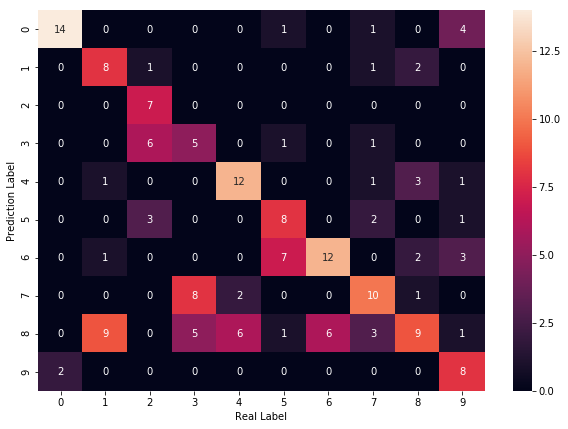

In [11]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [12]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:0 index:[8] real:5
#1 min_error:0 index:[2] real:2
#2 min_error:0 index:[1] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:0 index:[1] real:1
#5 min_error:0 index:[7] real:7
#6 min_error:0 index:[6] real:6
#7 min_error:0 index:[3] real:3
#8 min_error:0 index:[2] real:2
#9 min_error:0 index:[1] real:1
#10 min_error:0 index:[3] real:7
#11 min_error:0 index:[8] real:4
#12 min_error:0 index:[8] real:6
#13 min_error:0 index:[3] real:3
#14 min_error:0 index:[1] real:1
#15 min_error:0 index:[3] real:3
#16 min_error:0 index:[6] real:9
#17 min_error:0 index:[1] real:1
#18 min_error:0 index:[5] real:7
#19 min_error:0 index:[6] real:6
#20 min_error:0 index:[6] real:8
#21 min_error:0 index:[8] real:4
#22 min_error:0 index:[3] real:3
#23 min_error:0 index:[1] real:1
#24 min_error:0 index:[4] real:4
#25 min_error:0 index:[9] real:0
#26 min_error:0 index:[5] real:5
#27 min_error:0 index:[3] real:3
#28 min_error:0 index:[8] real:6
#29 min_error:1 index:[0 4 7] real:9
#30 min_error:0 

In [13]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.6097711811997526
Avg Base Learner:0.8736858379715522


In [14]:
from random import randint

list_acc = []

for iii in range(4):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.14444444444444443
Accuracy on training set: 0.12222222222222222
Accuracy on training set: 0.2833333333333333
Accuracy on training set: 0.4166666666666667


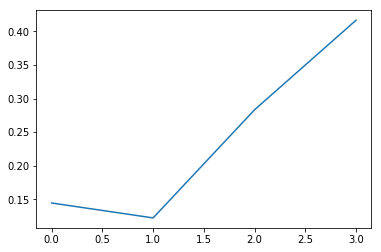

In [15]:
plt.plot(range(4),list_acc)
plt.show()

In [16]:
list_acc

[0.14444444444444443,
 0.12222222222222222,
 0.2833333333333333,
 0.4166666666666667]